In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_featured = pd.read_csv('data/food-facts/usa.featureEngineering.tsv', sep='\t')

C:\Users\TaeWoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df_featured.shape

(172941, 36)

In [27]:
df_featured.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic,grams,salt_sodium_100g
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0214,0.0,0.0,0.0,0.0,0.0,False,28.0,0.00000
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False,28.0,0.88500
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,28.0,1.70628
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,35.0,0.00000
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False,52.0,0.00000


In [46]:
df_featured[df_featured['sugars_100g'] > 60]

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic,grams,salt_sodium_100g
35,36,18562,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T09:07:42Z,"Sweeteners, Demerara Turbinado Sugar","Wholesome, Wholesome Sweeteners",us,Raw cane demerara sugar.,None,4 g (1 tsp),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False,4.0,0.00000
68,74,33268,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,"Sweeteners, Organic Fair Trade Sugar","Wholesome, Wholesome Sweeteners",us,Organic evaporated cane juice.,None,4 g (1 tsp),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,4.0,0.00000
97,103,35323,http://world-en.openfoodfacts.org/product/0000...,2017-03-10T09:34:30Z,Organic Grade B Maple Syrup,Coombs Family,us,Maple,None,15 ml (1 Tbsp),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,15.0,0.04602
139,148,43595,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T09:07:04Z,Cranberries,Torn & Glasser,us,"Cranberries, sugar, sunflower oil.",None,30 g (0.25 cup),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False,30.0,0.00000
143,152,45421,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Chili Mango,Torn & Glasses,us,"Dried mango, paprika, sugar, salt, citric acid...",None,40 g (3 PIECES),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False,40.0,2.74350
149,160,58070,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:09Z,Organic Medjool Dates,Unfi,us,Organic medjool dates.,None,100 g (100 g),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,100.0,0.01770
150,161,58131,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:21Z,Organic Pitted Prunes,Pcc,us,Organic dried plums,None,40 g (40 g),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,40.0,0.00000
151,162,58148,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:10Z,Organic Pitted Deglet Dates,Kid Picks,us,Organic deglet noor dates,None,40 g (40 g),...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True,40.0,0.00000
152,163,58179,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Sweetened Dried Cranberries,Kid Picks,us,"Apple juice concentrate, cranberries, sunflowe...",None,40 g (0.333 cup),...,0.0,0.0030,0.0,0.0,0.0,0.0,0.0,False,40.0,0.00000
153,164,58223,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:09Z,Organic Zante Currants,Unfi,us,Organic zante currants,None,40 g (0.25 cup),...,0.0,0.0045,0.0,0.0,0.0,0.0,0.0,True,40.0,0.00000


In [118]:
# extract product name by salt & sugar
#df_featured[ df_featured['product_name'].str.contains(r"(sugar|Sugar)", case=True)]
df_featured['titled_sugar'] = df_featured['product_name'].str.contains(r"(sugar|Sugar)")

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
df_featured['titled_sugar'] = df_featured['titled_sugar'].astype(float)

In [92]:
df_featured['titled_salt'] = df_featured['product_name'].str.contains(r"(salt|Salt)")

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [119]:
df_featured.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic,grams,salt_sodium_100g,titled_sugar,titled_salt
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.00000,False,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.88500,False,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,28.0,1.70628,False,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,35.0,0.00000,False,False
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0,0.0,False,52.0,0.00000,False,False


In [123]:
df_sugar = df_featured[(df_featured['sugars_100g'] > 80) & (df_featured['titled_sugar'] == True)]

In [124]:
df_sugar.shape

(493, 38)

In [126]:
df_sugar[['product_name','sugars_100g']].head()

,product_name,sugars_100g
35,"Sweeteners, Demerara Turbinado Sugar",100.00
68,"Sweeteners, Organic Fair Trade Sugar",100.00
158,Organic Unrefined Mascobado Sugar,100.00
2619,Sugar & Cinnamon,85.71
2638,"Dessert Topping, Red Sugar",100.00


In [127]:
df_salt = df_featured[(df_featured['salt_100g'] > 80) & (df_featured['titled_salt'] == True)]

In [128]:
df_salt.shape

(476, 38)

In [130]:
df_salt[['product_name','salt_100g']].head()

,product_name,salt_100g
24,Real Salt Granular,96.15678
67,Fine Sea Salt,99.90582
379,Mediterranean Sea Salt,105.83418
1468,Celery Salt,83.45678
1469,Garlic Salt Seasoning,87.92210


In [131]:
df_rm_pure_salt_sugar = df_featured[((df_featured['sugars_100g'] < 80) & (df_featured['titled_sugar'] == False)) | 
                                   ((df_featured['salt_100g'] < 80) & (df_featured['titled_salt'] == False))]

In [132]:
df_rm_pure_salt_sugar.shape

(172922, 38)

In [134]:
df_rm_pure_salt_sugar.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic,grams,salt_sodium_100g,titled_sugar,titled_salt
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.00000,False,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.88500,False,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,28.0,1.70628,False,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,35.0,0.00000,False,False
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0,0.0,False,52.0,0.00000,False,False


In [133]:
def bar_chart(feature):
    # create pandas.core.series.Series
    none = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False][feature].value_counts()
    organic = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True][feature].value_counts()
    df_deter_organic = pd.DataFrame([none,organic])
    df_deter_organic.index = ['Non-organic','Organic']
    df_deter_organic.plot(kind='bar',stacked=True, figsize=(10,5))

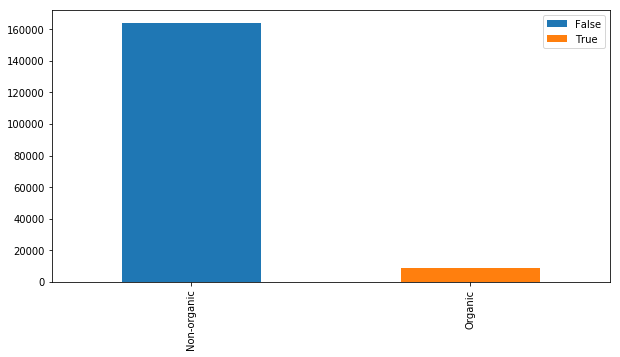

In [146]:
bar_chart('organic')

In [167]:
df_rm_pure_salt_sugar['organic'].shape

(172922,)

In [168]:
df_rm_pure_salt_sugar['organic'].value_counts()

False    163813
True       9109
Name: organic, dtype: int64

In [164]:
seri_ogranic = df_rm_pure_salt_sugar['organic'].value_counts().astype(float) / df_rm_pure_salt_sugar.shape[0]

In [165]:
seri_ogranic

False    0.947323
True     0.052677
Name: organic, dtype: float64

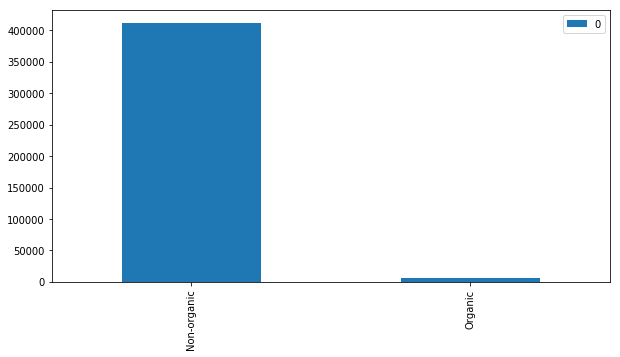

In [169]:
none = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['salt_100g'].sum()
organic = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['salt_100g'].sum()
df_organic_salt = pd.DataFrame([none,organic])
df_organic_salt.index = ['Non-organic','Organic']
df_organic_salt.plot(kind='bar',stacked=True, figsize=(10,5))

In [171]:
df_organic_salt

,0
Non-organic,411365.422724
Organic,6542.174295


In [174]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['salt_100g'].sum() / df_organic_salt.sum()

0    0.984345
dtype: float64

In [175]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['salt_100g'].sum() / df_organic_salt.sum()

0    0.015655
dtype: float64

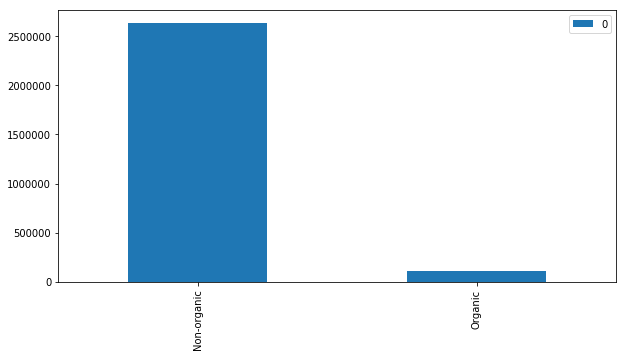

In [191]:
none_sugar = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['sugars_100g'].sum()
organic_sugar  = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['sugars_100g'].sum()
df_organic_sugar = pd.DataFrame([none_sugar,organic_sugar])
df_organic_sugar.index = ['Non-organic','Organic']
df_organic_sugar.plot(kind='bar',stacked=True, figsize=(10,5))

In [192]:
df_organic_sugar

,0
Non-organic,2632876.396
Organic,115421.587


In [193]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['sugars_100g'].sum() / df_organic_sugar.sum()

0    0.958003
dtype: float64

In [194]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['sugars_100g'].sum() / df_organic_sugar.sum()

0    0.041997
dtype: float64

In [195]:
len(df_rm_pure_salt_sugar['brands'].unique())

28285

In [196]:
seri_brands_cnt = df_rm_pure_salt_sugar['brands'].value_counts()

In [197]:
seri_brands_cnt.drop('None', inplace=True)

In [198]:
seri_brands_cnt.iloc[0:200]

Meijer                                           1995
Kroger                                           1656
Ahold                                            1368
Spartan                                          1341
Roundy's                                         1299
Great Value                                      1223
Weis                                             1053
Target Stores                                     947
Shoprite                                          943
Food Club                                         831
Harris Teeter                                     794
Food Lion                                         683
Essential Everyday                                682
Goya                                              672
Schnucks                                          644
Weis Quality                                      580
Hannaford,  Hannaford Bros. Co.                   569
Giant                                             561
Giant Eagle                 

In [24]:
# remove duplicate
df_rm_dup = df_base[df_base.code.duplicated() == False]

In [25]:
df_rm_dup.shape

(172944, 33)

In [39]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [33]:
# NaN makes an error
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']] = \
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']].fillna("None").values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
# NaN makes an error
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']] = \
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']].fillna(0).values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,iron_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.00129,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.00129,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.00514,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.00000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.00346,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


In [38]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [42]:
df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

0         False
1         False
2          True
3          True
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12         True
13         True
14        False
15         True
16         True
17         True
18         True
19        False
20        False
21         True
22        False
23        False
24        False
25         True
26        False
27        False
28        False
29         True
          ...  
173032    False
173033    False
173034    False
173035    False
173036    False
173037    False
173038    False
173039    False
173040    False
173041    False
173042    False
173043    False
173044    False
173045    False
173046    False
173047    False
173048    False
173049    False
173050    False
173051    False
173052    False
173053    False
173054    False
173055    False
173056    False
173057     True
173058    False
173060    False
173061    False
173062    False
Name: product_name, Leng

In [43]:
# df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)
df_rm_dup['organic'] = df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 34 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [46]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False


In [50]:
df_rm_dup.serving_size.unique

<bound method Series.unique of 0             28 g (1 ONZ)
1          28 g (0.25 cup)
2          28 g (0.25 cup)
3          35 g (0.25 cup)
4           52 g (0.5 cup)
5          45 g (0.25 cup)
6           64 g (0.5 cup)
7              40 g (40 g)
8            14 g (1 Tbsp)
9          48 g (0.25 cup)
10          57 g (0.5 cup)
11         30 g (0.25 cup)
12           21 g (2 Tbsp)
13         33 g (0.25 cup)
14          55 g (0.5 cup)
15         28 g (0.25 cup)
16         30 g (0.25 cup)
17         45 g (0.25 cup)
18         42 g (0.25 cup)
19         40 g (0.25 cup)
20         30 g (0.25 cup)
21          55 g (0.5 cup)
22         30 g (0.25 cup)
23           45 g (45 GRM)
24        1.4 g (0.25 tsp)
25          54 g (0.5 cup)
26             30 g (30 g)
27             30 g (30 g)
28             30 g (30 g)
29         30 g (0.25 cup)
                ...       
173032         56 g (56 g)
173033       70 g (2.5 oz)
173034      130 g (4.6 oz)
173035         85 g (3 oz)
173036         85 g (3 o